In [1]:
# 1/20/2020 20 threads, 40G
    #read csv: wall time: 7min 45s
    #read dta: Wall time: 1h 3min 45s
    
# 1/21/2020 20 threads, 100G
    #read csv: Wall time: 5min 48s
    #read dta: Wall time: 37min 3s
    
# 1/21/2020 1:54PM, 20 threads, 100G
    #read csv: Wall time: 8min 16s
    #read dta: Wall time: 

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 20)
!date

Thu Jan 30 17:08:12 PST 2020


# 2010 census demo data -- changes to all on-reservation populations

Akee's talk here: https://vimeo.com/380264104

Findings: Slight downward bias in urban 85+ year old population--otherwise looks pretty balanced.

In [3]:
location_cols = ['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK']

aian_cols = ['P0030005','P0060004'] # AIAN alone, AIAN combo
black_cols = ['P0030003','P0060003'] #black alone, black combo
elder = ['P0120025'] #85+ years
keep_cols = location_cols + black_cols + aian_cols + elder

def my_cols(x):
    if x.startswith('P001'):
        return True
    elif x.startswith(('AIAN','AITS','TTRACT','TBLGRP','UA','UR')):
        return True
    else:
        return (x in keep_cols)

In [4]:
%%time

df_dp = pd.read_csv('/home/j/temp/abie/fiftystates2010dhc.csv', usecols=my_cols)

<string>:2: DtypeWarning: Columns (28,32,33,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 13min 45s, sys: 39.3 s, total: 14min 24s
Wall time: 14min 44s


In [5]:
dta_columns = [x.lower() for x in df_dp.columns] #grab col names as lowercase
dta_columns[-6:] = [x.upper() for x in dta_columns[-6:]] #coded vars are capitalized

In [6]:
#checkout how close the distribution of these vars are to AIAN alone
#P0030003 = black alone
#P0120025 = 85+ year olds
#P0030005 = AIAN alone
df_dp[['P0030003','P0120025','P0030005']].describe()

,P0030003,P0120025,P0030005
count,1.371779e+07,1.371779e+07,1.371779e+07
mean,1.566265e+02,7.027128e+00,6.094926e+01
std,8.249752e+03,3.286513e+02,5.442057e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00
max,3.073882e+06,2.104250e+05,4.861033e+06


In [9]:
#checkout population sums
df_dp[['P0030003','P0120025','P0030005']].sum()

P0030003    2148570564
P0120025      96396696
P0030005     836089386
dtype: int64

In [10]:
#%%time
#
# r = pd.read_stata('/home/j/temp/abie/all50states_2010ur1_all_vars.dta', columns=dta_columns,
#                   chunksize=100_000, convert_missing=True, preserve_dtypes=False)

# df_sf = pd.DataFrame()
# for t in r:
#     print('.', flush=True, end=' ')
#     df_sf = df_sf.append(t[t.block != ''])
# df_sf.shape

# saved AIAN-relevant vars here; loads faster than the .dta
df_sf = pd.read_csv('/home/j/temp/beatrixh/2020_census/elderly_black_aian_census2010.csv')

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# df_sf.to_csv(r'/home/j/temp/beatrixh/2020_census/elderly_black_aian_census2010.csv', index = None, header=True)

In [11]:
df_sf.columns = [x.upper() for x in df_sf.columns]

In [12]:
#store columns by type
float_cols = list(df_dp.loc[:, df_dp.dtypes == np.float64].columns)
int_cols = df_dp.loc[:, df_dp.dtypes == np.int64].columns

#conver df_sf to correct dtypes
df_sf.loc[:,float_cols] = df_sf.loc[:,float_cols].astype(np.float64)
df_sf.loc[:,int_cols] = df_sf.loc[:,int_cols].astype(np.int64)

In [13]:
count_vars = list(df_sf.columns[[x.startswith("P0") for x in df_sf.columns]])

In [14]:
left = df_sf[keep_cols + ['P0010001']]
df = pd.merge(left[(left.BLOCK != '')], df_dp.dropna(subset=['BLOCK']), left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,STATE,COUNTY,TRACT,BLKGRP,BLOCK,P0030003_SF,P0060003_SF,P0030005_SF,P0060004_SF,P0120025_SF,...,UR,AIANHHNS,AITSNS,AIANHHSC,P0010001_DP,P0030003_DP,P0030005_DP,P0060003_DP,P0060004_DP,P0120025_DP
0,2,13.0,100.0,1.0,1363.0,4,4,5,0,0,...,R,99999999.0,99999999.0,NaN,87,0,0,0,42,0
1,2,13.0,100.0,1.0,1366.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
2,2,13.0,100.0,1.0,1369.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
3,2,13.0,100.0,1.0,1370.0,0,0,0,0,0,...,R,2418758.0,99999999.0,NaN,0,0,0,0,0,0
4,2,13.0,100.0,1.0,1371.0,180,182,438,27,1,...,R,2418758.0,99999999.0,NaN,988,130,361,149,129,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071785,56,45.0,951100.0,1.0,1868.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
11071786,56,45.0,951100.0,1.0,1869.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
11071787,56,45.0,951100.0,1.0,1870.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0
11071788,56,45.0,951100.0,1.0,1871.0,0,0,0,0,0,...,R,99999999.0,99999999.0,NaN,0,0,0,0,0,0


# checkout non-res AIAN

In [15]:
count_vars_sfdp = [s + "_SF" for s in count_vars]+[s + "_DP" for s in count_vars]
tract_df = df.groupby(['STATE','COUNTY','TRACT'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

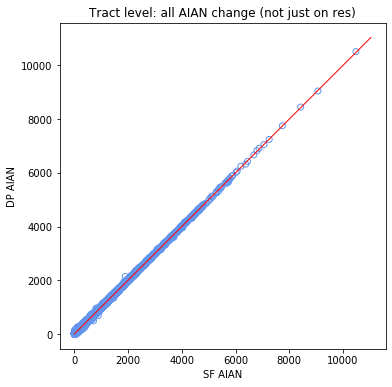

In [16]:
#all AIAIN (not just on-res) change
x = tract_df[["P0030005_SF"]]
y = tract_df[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF AIAN')
plt.ylabel('DP AIAN')
plt.title('Tract level: all AIAN change (not just on res)')

plt.show()

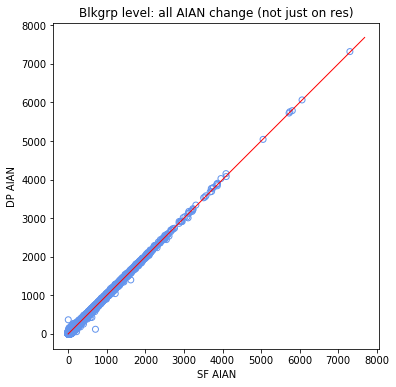

In [17]:
blkgrp_df = df.groupby(['STATE','COUNTY','TRACT','BLKGRP'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

#all AIAIN (not just on-res) change
x = blkgrp_df[["P0030005_SF"]]
y = blkgrp_df[["P0030005_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF AIAN')
plt.ylabel('DP AIAN')
plt.title('Blkgrp level: all AIAN change (not just on res)')

plt.show()

# checkout on reservation changes

In [18]:
fed_res = df[(df.AIANHH<5000)].copy(deep=True)

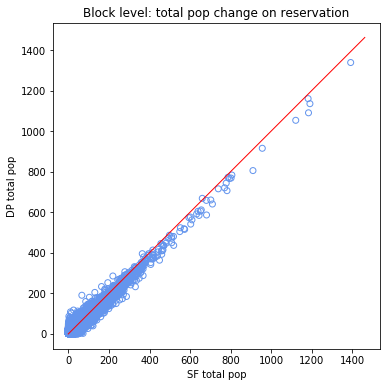

In [49]:
#all pop on reservation change
x = fed_res[["P0010001_SF"]]
y = fed_res[["P0010001_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF total pop')
plt.ylabel('DP total pop')
plt.title('Block level: total pop change on reservation')

plt.show()

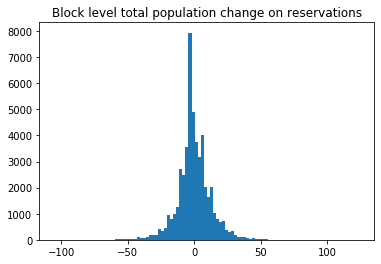

In [24]:
fed_res['abs_diff_total_pop'] = fed_res['P0010001_DP'] - fed_res['P0010001_SF']
#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(fed_res[(fed_res.P0010001_DP!=0) | (fed_res.P0010001_SF!=0)].abs_diff_total_pop, bins = 100)

plt.title('Block level total population change on reservations')

plt.show()

In [35]:
# small downward change
fed_res[(fed_res.P0010001_DP!=0) | (fed_res.P0010001_SF!=0)].abs_diff_total_pop.describe()

count    49681.000000
mean        -0.153982
std         12.655503
min       -105.000000
25%         -6.000000
50%         -1.000000
75%          6.000000
max        124.000000
Name: abs_diff_total_pop, dtype: float64

In [36]:
# as compared to aian..
fed_res['abs_diff_aian'] = fed_res['P0030005_DP'] - fed_res['P0030005_SF']
fed_res[(fed_res.P0030005_DP!=0) | (fed_res.P0030005_SF!=0)].abs_diff_aian.describe()

count    3280.000000
mean        0.569817
std         5.669026
min       -52.000000
25%        -2.000000
50%        -1.000000
75%         3.000000
max        50.000000
Name: abs_diff_aian, dtype: float64

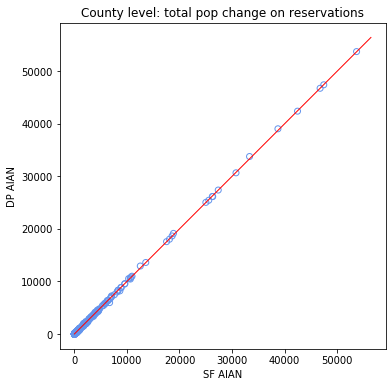

In [43]:
fed_res_county = fed_res.groupby(['STATE','COUNTY'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

#all pop on reservation change
x = fed_res_county[["P0010001_SF"]]
y = fed_res_county[["P0010001_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF AIAN')
plt.ylabel('DP AIAN')
plt.title('County level: total pop change on reservations')

plt.show()

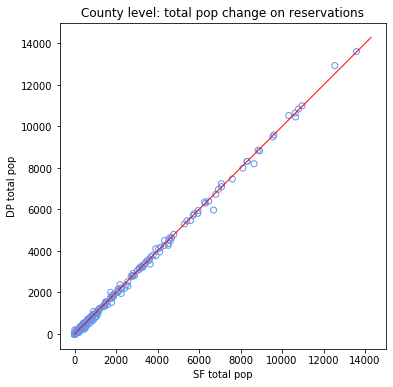

In [45]:
#all pop on reservation change, zooming in
x = fed_res_county[(fed_res_county.P0010001_SF<1.5e4) | (fed_res_county.P0010001_DP<1.5e4)][["P0010001_SF"]]
y = fed_res_county[(fed_res_county.P0010001_SF<1.5e4) | (fed_res_county.P0010001_DP<1.5e4)][["P0010001_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF total pop')
plt.ylabel('DP total pop')
plt.title('County level: total pop change on reservations')

plt.show()

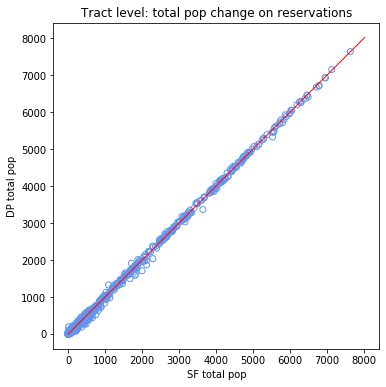

In [46]:
fed_res_tract = fed_res.groupby(['STATE','COUNTY','TRACT'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

#all pop on reservation change
x = fed_res_tract[["P0010001_SF"]]
y = fed_res_tract[["P0010001_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF total pop')
plt.ylabel('DP total pop')
plt.title('Tract level: total pop change on reservations')

plt.show()

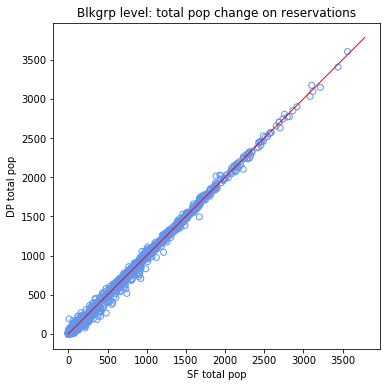

In [51]:
fed_res_blkgrp = fed_res.groupby(['STATE','COUNTY','TRACT','BLKGRP'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

#all pop on reservation change
x = fed_res_blkgrp[["P0010001_SF"]]
y = fed_res_blkgrp[["P0010001_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF total pop')
plt.ylabel('DP total pop')
plt.title('Blkgrp level: total pop change on reservations')

plt.show()

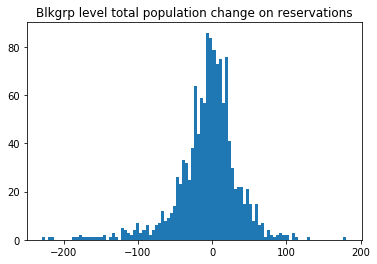

In [53]:
fed_res_blkgrp['abs_diff_total_pop'] = fed_res_blkgrp['P0010001_DP'] - fed_res_blkgrp['P0010001_SF']
#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(fed_res_blkgrp[(fed_res_blkgrp.P0010001_DP!=0) | (fed_res_blkgrp.P0010001_SF!=0)].abs_diff_total_pop, bins = 100)

plt.title('Blkgrp level total population change on reservations')

plt.show()

In [55]:
#total population change on reservations, excluding zeros that stayed zeros
fed_res_blkgrp[(fed_res_blkgrp.P0010001_DP!=0) | (fed_res_blkgrp.P0010001_SF!=0)].abs_diff_total_pop.describe()

count    1309.000000
mean       -5.844156
std        41.036124
min      -229.000000
25%       -23.000000
50%        -1.000000
75%        16.000000
max       181.000000
Name: abs_diff_total_pop, dtype: float64

In [56]:
#total population change on reservations, including zeros that stayed zeros
fed_res_blkgrp.abs_diff_total_pop.describe()

count    1681.000000
mean       -4.550863
std        36.290149
min      -229.000000
25%       -15.000000
50%         0.000000
75%        10.000000
max       181.000000
Name: abs_diff_total_pop, dtype: float64

In [33]:
blkgrp_df_res = fed_res.groupby(['STATE','COUNTY','TRACT'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

# checkout black alone on reservation

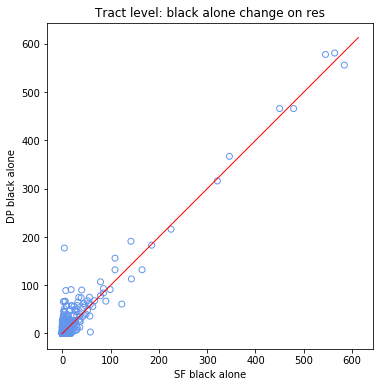

In [57]:
# black alone change on reservation, excluding navajo
x = blkgrp_df_res[(blkgrp_df_res.P0030003_SF<3000)][["P0030003_SF"]]
y = blkgrp_df_res[(blkgrp_df_res.P0030003_SF<3000)][["P0030003_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF black alone')
plt.ylabel('DP black alone')
plt.title('Tract level: black alone change on res')

plt.show()

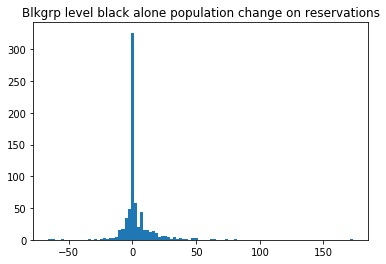

In [62]:
blkgrp_df_res['abs_diff_black_alone'] = blkgrp_df_res['P0030003_DP'] - blkgrp_df_res['P0030003_SF']
#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(blkgrp_df_res[(blkgrp_df_res.P0010001_DP!=0) | (blkgrp_df_res.P0010001_SF!=0)].abs_diff_black_alone, bins = 100)

plt.title('Blkgrp level black alone population change on reservations')

plt.show()

In [64]:
#slight uptick?
blkgrp_df_res[(blkgrp_df_res.P0010001_DP!=0) | (blkgrp_df_res.P0010001_SF!=0)].abs_diff_black_alone.describe()

count    704.000000
mean       2.965909
std       13.740906
min      -66.000000
25%       -1.000000
50%        0.000000
75%        4.000000
max      173.000000
Name: abs_diff_black_alone, dtype: float64

# check out non-AIAN on-reservation

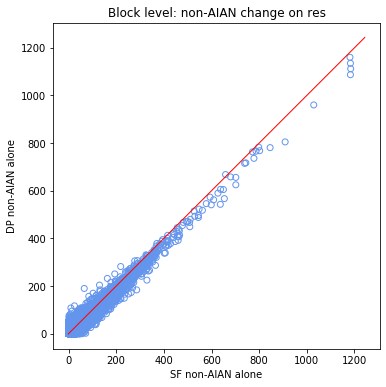

In [74]:
fed_res['non_AIAN_SF'] = fed_res['P0010001_SF'] - fed_res['P0030005_SF']
fed_res['non_AIAN_DP'] = fed_res['P0010001_DP'] - fed_res['P0030005_DP']

x = fed_res[["non_AIAN_SF"]]
y = fed_res[["non_AIAN_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF non-AIAN alone')
plt.ylabel('DP non-AIAN alone')
plt.title('Block level: non-AIAN change on res')

plt.show()

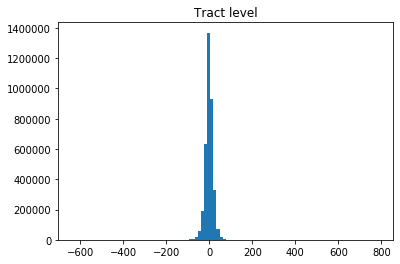

In [27]:
urban['abs_diff_total_pop'] = urban['P0010001_DP'] - urban['P0010001_SF']
#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban[(urban.P0010001_DP!=0) | (urban.P0010001_SF!=0)].abs_diff_total_pop, bins = 100)

plt.title('Tract level')

plt.show()

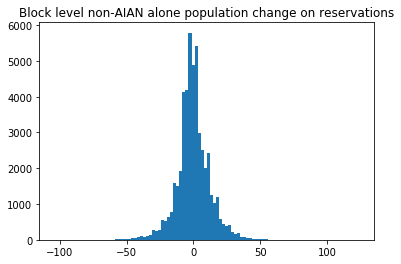

In [66]:
fed_res['non_AIAN_abs_diff'] = fed_res['non_AIAN_DP'] - fed_res['non_AIAN_SF']

fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(fed_res[(fed_res.non_AIAN_DP!=0) | (fed_res.non_AIAN_SF!=0)].non_AIAN_abs_diff, bins = 100)

plt.title('Block level non-AIAN alone population change on reservations')

plt.show()

In [67]:
#on-res change for non-AIAN, block level
fed_res[(fed_res.non_AIAN_DP!=0) | (fed_res.non_AIAN_SF!=0)].non_AIAN_abs_diff.describe()

count    49664.000000
mean        -0.191668
std         12.551359
min       -104.000000
25%         -6.000000
50%         -1.000000
75%          6.000000
max        124.000000
Name: non_AIAN_abs_diff, dtype: float64

In [69]:
#on-res change AIAN, block level
fed_res[(fed_res.P0030005_DP!=0) | (fed_res.P0030005_SF!=0)].abs_diff_aian.describe()

count    3280.000000
mean        0.569817
std         5.669026
min       -52.000000
25%        -2.000000
50%        -1.000000
75%         3.000000
max        50.000000
Name: abs_diff_aian, dtype: float64

In [70]:
#on-res change all, block level
fed_res[(fed_res.P0010001_DP!=0) | (fed_res.P0010001_SF!=0)].abs_diff_total_pop.describe()

count    49681.000000
mean        -0.153982
std         12.655503
min       -105.000000
25%         -6.000000
50%         -1.000000
75%          6.000000
max        124.000000
Name: abs_diff_total_pop, dtype: float64

In [71]:
county_res = fed_res.groupby(['STATE','COUNTY'])[count_vars_sfdp].apply(lambda x : x.astype(int).sum())

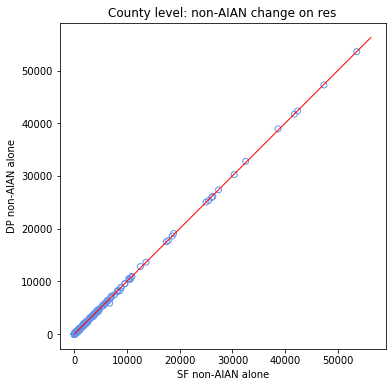

In [73]:
county_res['non_AIAN_SF'] = county_res['P0010001_SF'] - county_res['P0030005_SF']
county_res['non_AIAN_DP'] = county_res['P0010001_DP'] - county_res['P0030005_DP']

x = county_res[["non_AIAN_SF"]]
y = county_res[["non_AIAN_DP"]]

fig = plt.figure() 
fig.set_size_inches(6,6)

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
ax.set_aspect('equal', adjustable='box')

xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
lim = max(xright,ytop)
ax.plot([-1,lim],[-1,lim], 'red', linewidth=1)

plt.xlabel('SF non-AIAN alone')
plt.ylabel('DP non-AIAN alone')
plt.title('County level: non-AIAN change on res')

plt.show()